# More Circuit Identities<br>
When we program quantum computers, our aim is always to build useful quantum circuits from the basic building blocks. But sometimes, we might not have all the basic building blocks we want. In this section, we'll look at how we can transform basic gates into each other, and how to use them to build some gates that are slightly more complex (but still pretty basic).

## Making controlled Z from CNOT

In [10]:
from qiskit import *
from qiskit.circuit import Gate
from math import pi
from qiskit.visualization import *
from matplotlib import style
style.use('dark_background')

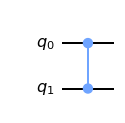

In [11]:
qc = QuantumCircuit(2)
c = 0
t = 1
# a controlled-Z
qc.cz(c,t)
qc.draw('mpl')

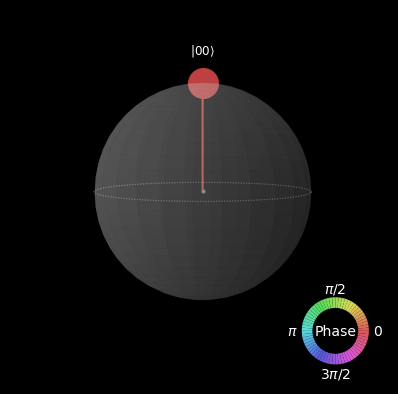

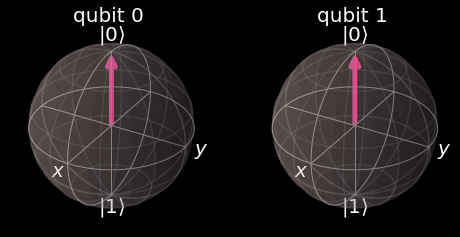

In [13]:
backend = Aer.get_backend('statevector_simulator')
statevec = execute(qc, backend).result().get_statevector()
display(plot_state_qsphere(statevec))
plot_bloch_multivector(statevec)

## Equivalent circuit

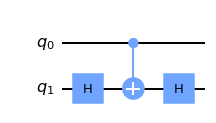

In [7]:
qc = QuantumCircuit(2)
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw('mpl')

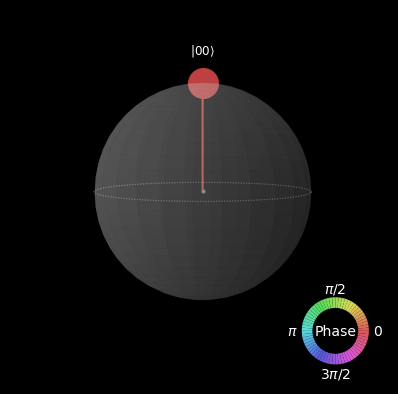

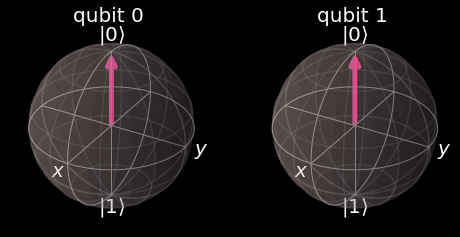

In [14]:
backend = Aer.get_backend('statevector_simulator')
statevec = execute(qc, backend).result().get_statevector()
display(plot_state_qsphere(statevec))
plot_bloch_multivector(statevec)

More generally, we can transform a single CNOT into a controlled version of any rotation around the Bloch sphere by an angle  π ,by simply preceding and following it with the correct rotations. For example, a controlled- Y :

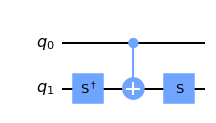

In [15]:
qc = QuantumCircuit(2)
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.draw('mpl')

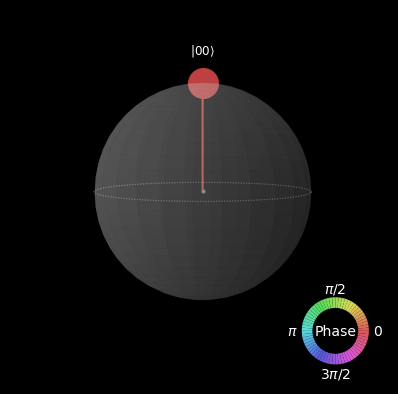

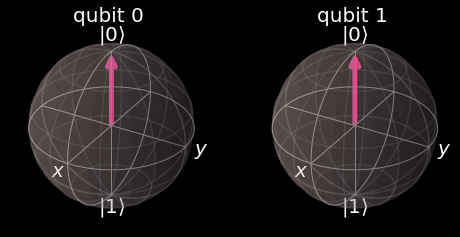

In [16]:
backend = Aer.get_backend('statevector_simulator')
statevec = execute(qc, backend).result().get_statevector()
display(plot_state_qsphere(statevec))
plot_bloch_multivector(statevec)

Controlled H

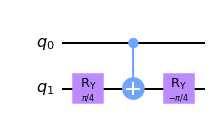

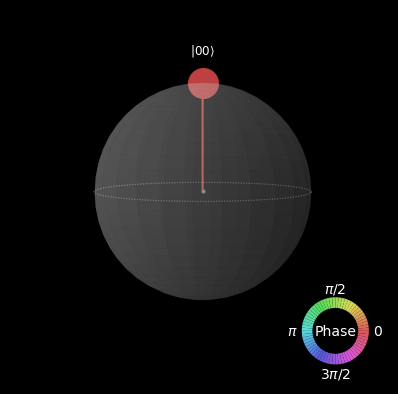

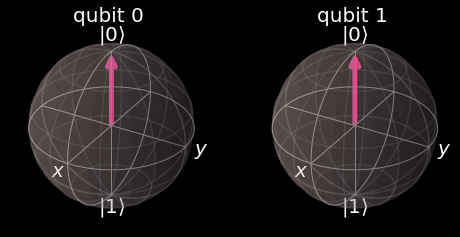

In [18]:
qc = QuantumCircuit(2)
qc.ry(pi/4, t)
qc.cx(c,t)
qc.ry(-pi/4,t)
display(qc.draw('mpl'))
backend = Aer.get_backend('statevector_simulator')
statevec = execute(qc, backend).result().get_statevector()
display(plot_state_qsphere(statevec))
plot_bloch_multivector(statevec)

## Swapping Qubits

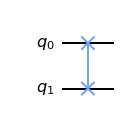

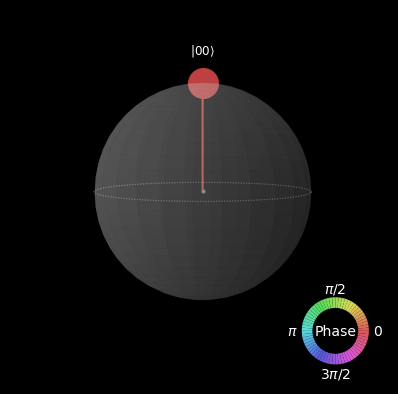

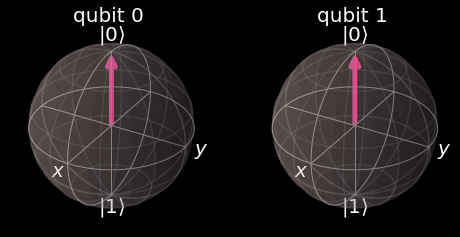

In [20]:
a = 0
b = 1
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
display(qc.draw('mpl'))
backend = Aer.get_backend('statevector_simulator')
statevec = execute(qc, backend).result().get_statevector()
display(plot_state_qsphere(statevec))
plot_bloch_multivector(statevec)

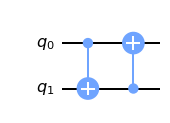

In [21]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.cx(1,0)
qc.draw('mpl')